### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
print(data.shape)
data.isna().sum()

(12684, 26)


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
# Print unique values for each column to identify problematic data.
def print_columns_unique_values(df):
    for column in df.columns:
        print(f"Column Name: {column}, DataType: {df[column].dtype}")
        print(df[column].unique())
        print("\n")

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Create a copy of the original data.
working_data = data

# There are 12,684 rows and working_data['cars'] has 12,576 nan values. Drop the column
working_data = working_data.drop(columns=['car'])

working_data.isna().sum()


destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [8]:
# The columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restarant20To50 has nan. These rows represent less than 5% of the total 12,684 rows. Drop these rows

working_data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'], inplace=True)

working_data.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [9]:
# Convert columns to appropriate data types

working_data['age'].unique()


array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [10]:
# There are two string values in age 50plus and below21. Convert these to int values 51 and 18 respectively.

working_data['age'] = working_data['age'].replace({'50plus': '51', 'below21': '18'})

working_data['age'].info()

# Convert age to numeric
working_data['age'] = pd.to_numeric(working_data['age'], errors='coerce')

working_data.isna().sum()

<class 'pandas.core.series.Series'>
Index: 12079 entries, 22 to 12683
Series name: age
Non-Null Count  Dtype 
--------------  ----- 
12079 non-null  object
dtypes: object(1)
memory usage: 188.7+ KB


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [11]:
''' Convert income to int datatype. For this case the format of the row is "${min_amount} - ${max_amount}" with special cases like
"Less than $12500" and "$100000 or More". I will use the min_amount for regular cases and remove the dollar sign, for special cases, "Less than $12500" I will replace this value with 12500, and  "$100000 or More" will be replaced with 100000.
'''

def clean_income(income):
    if income == "Less than $12500":
        return 12_500
    elif income == "$100000 or More":
        return 100_000
    else:
        parsed_income = income.split("-")[0].replace("$", "")
        return int(parsed_income)

working_data['income'] = working_data['income'].apply(clean_income)

working_data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [12]:
# working_data.expiration.unique()

# Current values are "1d" and "2h", convert to 24 h
def convert_to_hours(value):
    if value == '1d':
        return 24
    elif value == '2h':
        return 2
    elif isinstance(value, (int,np.integer)):
        return value
    else:
        return np.nan

working_data['expiration'] = working_data['expiration'].apply(convert_to_hours)
working_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [13]:
working_data.isna().sum()


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [14]:

def to_24h_numeric(time):
    dt = datetime.strptime(time, '%I%p')
    return dt.hour

working_data['time'] = working_data['time'].apply(to_24h_numeric)
working_data


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,14,Restaurant(<20),24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10,Coffee House,2,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10,Carry out & Take away,2,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,14,Coffee House,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,18,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7,Carry out & Take away,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7,Coffee House,24,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [15]:
working_data.describe()

,temperature,time,expiration,age,has_children,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,13.812567,14.312278,32.456909,0.408478,47865.096448,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,5.408619,10.921896,10.584966,0.491573,30566.324078,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,7.000000,2.000000,18.000000,0.000000,12500.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,7.000000,2.000000,21.000000,0.000000,25000.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,14.000000,24.000000,31.000000,0.000000,37500.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,18.000000,24.000000,41.000000,1.000000,75000.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,22.000000,24.000000,51.000000,1.000000,100000.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
print_columns_unique_values(working_data)

Column Name: destination, DataType: object
['No Urgent Place' 'Home' 'Work']


Column Name: passanger, DataType: object
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


Column Name: weather, DataType: object
['Sunny' 'Rainy' 'Snowy']


Column Name: temperature, DataType: int64
[55 80 30]


Column Name: time, DataType: int64
[14 10 18  7 22]


Column Name: coupon, DataType: object
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


Column Name: expiration, DataType: int64
[24  2]


Column Name: gender, DataType: object
['Male' 'Female']


Column Name: age, DataType: int64
[21 46 26 31 41 51 36 18]


Column Name: maritalStatus, DataType: object
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


Column Name: has_children, DataType: int64
[0 1]


Column Name: education, DataType: object
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']




4. What proportion of the total observations chose to accept the coupon?



In [17]:

# Use the mean multiply by 100 to get percentage
proportion_accepted = working_data['Y'].mean() * 100

print(f'Total proportion of accepted coupon: {proportion_accepted:.2f}%')

Total proportion of accepted coupon: 56.93%


5. Use a bar plot to visualize the `coupon` column.

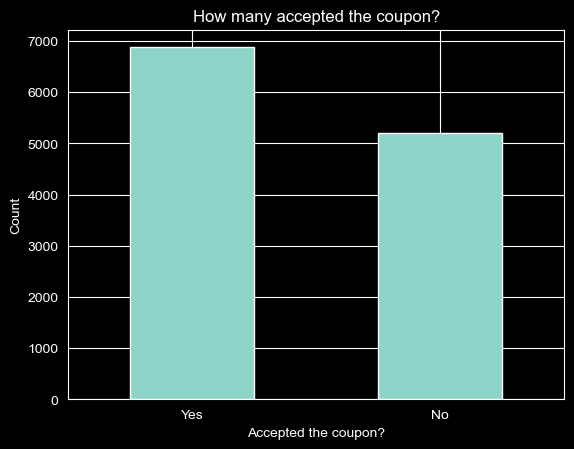

In [18]:
# Change 0/1 to No/Yes for better label visualization
working_data['Y'].map({0: 'No', 1: 'Yes'}).value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Accepted the coupon?')
plt.ylabel("Count")
plt.title("How many accepted the coupon?")
plt.savefig('images/how_many_accepted_coupon.png')
plt.show()


6. Use a histogram to visualize the temperature column.

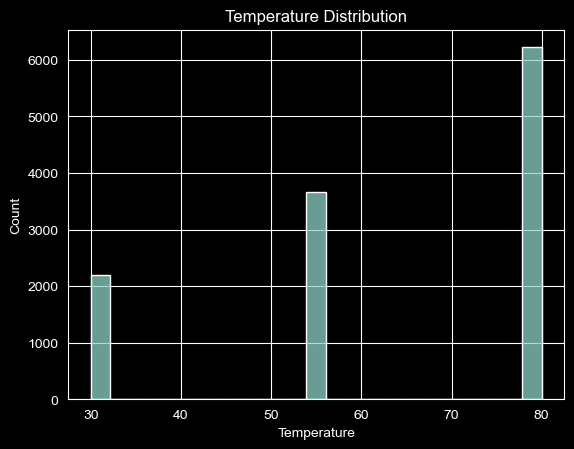

In [19]:
sns.histplot(working_data, x='temperature')
plt.xlabel("Temperature")
plt.title("Temperature Distribution")
plt.savefig('images/temperature_distribution.png')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
# Get the coupon with value Bar
bar_df = working_data.query('coupon == "Bar"')
bar_df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,18,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10,Bar,24,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,18,Bar,24,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,22,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,22,Bar,2,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10,Bar,24,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,18,Bar,2,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [21]:
# Get the Bar coupon that were acccepted
bar_accepted = bar_df.query('Y == 1')

# Divide the number of accepted bar coupons by total bar coupons to get the proportion
proportion_bar_accepted = (bar_accepted.shape[0]/ bar_df.shape[0]) * 100

print(f'Proportion of accepted bar coupons: {proportion_bar_accepted:.2f}%')

Proportion of accepted bar coupons: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [22]:
# Show different values in the 'Bar' column for accepted bar coupons
# print(bar_accepted['Bar'].value_counts())

less_than_3 = bar_accepted.query('Bar in ["never", "less1", "1~3"]')
more_than_3 = bar_accepted.query('Bar in ["4~8", "gt8"]')

acceptance_rate_less_than3 = (less_than_3.shape[0] / bar_df.shape[0]) * 100
acceptance_rate_more_than3 = (more_than_3.shape[0] / bar_df.shape[0]) * 100

print(f"Acceptance rate for drivers who went to a bar 3 or fewer times a month: {acceptance_rate_less_than3:.2f}%")
print(f"Acceptance rate for driver who went more than 3: {acceptance_rate_more_than3:.2f}%")



Acceptance rate for drivers who went to a bar 3 or fewer times a month: 33.51%
Acceptance rate for driver who went more than 3: 7.68%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
# Query the drivers that goes to bar more than once and age > 25
over25_more_than1= bar_accepted.query('Bar in ["1~3", "4~8", "gt8"] and age > 25')
acceptance_rate_over25_more_than1 = (over25_more_than1.shape[0] / bar_df.shape[0]) * 100
# Negate the above query to get all others
all_others = bar_accepted.query('~(Bar in ["1~3", "4~8", "gt8"] and age > 25)')
acceptance_rate_all_others = (all_others.shape[0] / bar_df.shape[0]) * 100

print(f"Acceptance rate > once/month and > 25 years: {acceptance_rate_over25_more_than1:.2f}")
print(f"Acceptance rate all other: {acceptance_rate_all_others:.2f}")



Acceptance rate > once/month and > 25 years: 14.53
Acceptance rate all other: 26.66


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [24]:

bar_more_than1 = bar_accepted.query('Bar in ["1~3", "4~8", "gt8"] and passanger != "Kid(s)" and occupation != "Farming Fishing & Forestry"')

acceptance_rate_not_kids = ( bar_more_than1.shape[0] / bar_df.shape[0] ) * 100

print(f"Acceptance rate: {acceptance_rate_not_kids:.2f}%")

Acceptance rate: 19.65%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [25]:
bar_more_than = bar_accepted.query('(Bar in ["1~3", "4~8", "gt8"] and '
                                   'passanger != "Kid(s)" and maritalStatus != "Widowed") or '
                                   '(Bar in ["1~3", "4~8", "gt8"] and age < 30) or '
                                   '(RestaurantLessThan20 in ["4~8", "1~3"]) and income < 50_000')

acceptance_rate_ =  (bar_more_than.shape[0] / bar_accepted.shape[0] ) * 100

print(f"Acceptance rate: {acceptance_rate_:.2f}%")

Acceptance rate: 65.23%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?


From my analysis above, I can understand some important things about how customers behave when they get bar coupon.
### 1. General Acceptance Patterns

**Overall versus Specific Coupons:**

When I look at all the data, the acceptance rate is 56.93% for all types of coupons. But for bar coupons specifically, it is much lower at only 41.19%. This tells me that bar coupons are depending more on the personal habits and lifestyle of people compared to other coupons like "Carry out" or "Restaurant (<$20)" which more people can use.

### 2. The Role of Regular Habits

**How Often People Visit Matters:**

The drivers who go to bars at least once per month, they accept the coupon much more.
The "Regular Customer" Pattern: In Question 3, I saw that most acceptances (33.51% of all bar coupons) come from people who visit bars 3 times or less per month. But this is probably because there are more people in this group. However, when I looked at Question 6, the people who go frequently to bars, they are the main group accepting these coupons.

### 3. Who Accepts and Social Situations

**Age and How People Live:**

The drivers over 25 years old who regularly go to bars (Question 4) are only 14.53% of acceptances. This means younger drivers who are under 25, or people who do not visit bars often, they make up bigger portion of people accepting bar coupons.
Traveling with Children is Important: When drivers have children with them, they do not want bar coupons. The data shows very clearly that drivers accept bar coupons much more when kids are not in the car (Question 5).
What Job People Have: The lifestyle and work background also matters. Drivers who work in jobs that are not agricultural (I mean not farming, fishing, or forestry) showed different pattern for accepting coupons.

### 4. Finding the Best Target Groups

When I analyzed Question 6, I found a specific "profile" that represents 65.23% of all accepted bar coupons. This high success group has these characteristics:

- Social and Regular Visitors: These are people who go to bars frequently, and they are either younger than 30 or they are not widowed.
- People Looking for Good Deals: These individuals go often to cheap restaurants and they earn less than $50,000 per year.

My Conclusion: The best target customers for bar coupons are young people and people who like budget friendly dining and eat frequently at cheap restaurants. The marketing should focus on these groups, and should avoid sending coupons when drivers have children in car.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

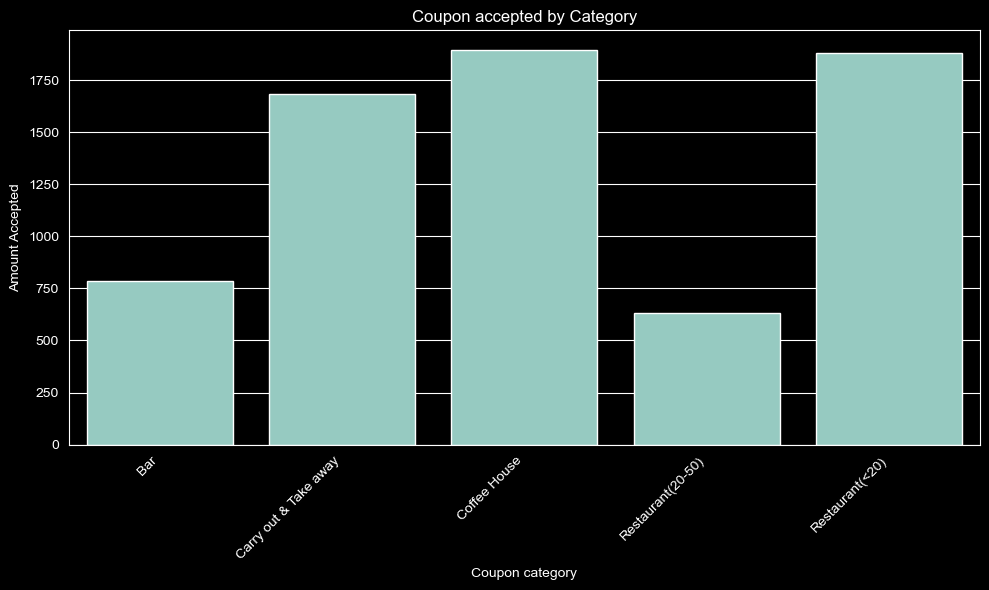

In [61]:
# Which coupon was accepted more?

coupon_accepted_count = working_data.query('Y == 1').groupby('coupon')['Y'].sum().reset_index()


# Plot result
plt.figure(figsize=(10, 6))
sns.barplot(coupon_accepted_count, x='coupon', y='Y')
plt.xticks(rotation=45, ha='right')
plt.title("Coupon accepted by Category")
plt.xlabel("Coupon category")
plt.ylabel("Amount Accepted")
plt.tight_layout()

plt.savefig("images/coupon_accepted_by_category.png", bbox_inches='tight')

plt.show()


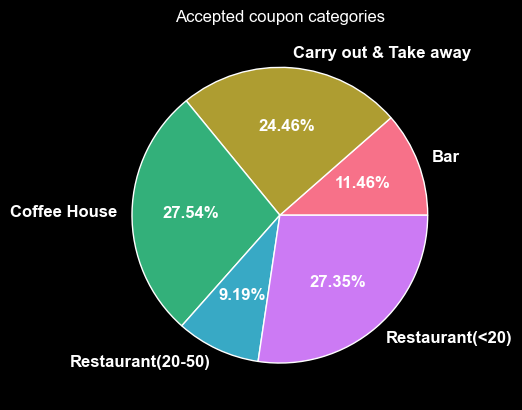

In [44]:
# Pie chart to compare categories
pie_data = coupon_accepted_count['Y']
plt.pie(pie_data, labels=coupon_accepted_count['coupon'], autopct='%1.2f%%', colors=sns.color_palette('husl', len(pie_data)),
        textprops={'color': 'white', 'fontsize': 12, 'weight': 'bold'})
plt.title("Accepted coupon categories")

plt.savefig('images/piechart_accepted_coupons.png')
plt.show()

In [45]:
# Now I'm interested in the three most accepted coupons by amount (Coffe House, restaurant(<20), and Carry out & Take away. These three coupons represent the 79.4% of accepted coupon.

# get top 3 coupons
top_3_coupons = coupon_accepted_count.sort_values(by='Y', ascending = False).head(3)['coupon'].values

# From top 3 coupons, get only the accepted
most_accepted_coupons = working_data.query('coupon in @top_3_coupons and Y == 1 ')

# Get the rate
most_accepted_coupons_rate = ( most_accepted_coupons.shape[0] / coupon_accepted_count['Y'].sum()) * 100

print(f"Most accepted coupon represent: {most_accepted_coupons_rate:.2f}%")



Most accepted coupon represent: 79.35%


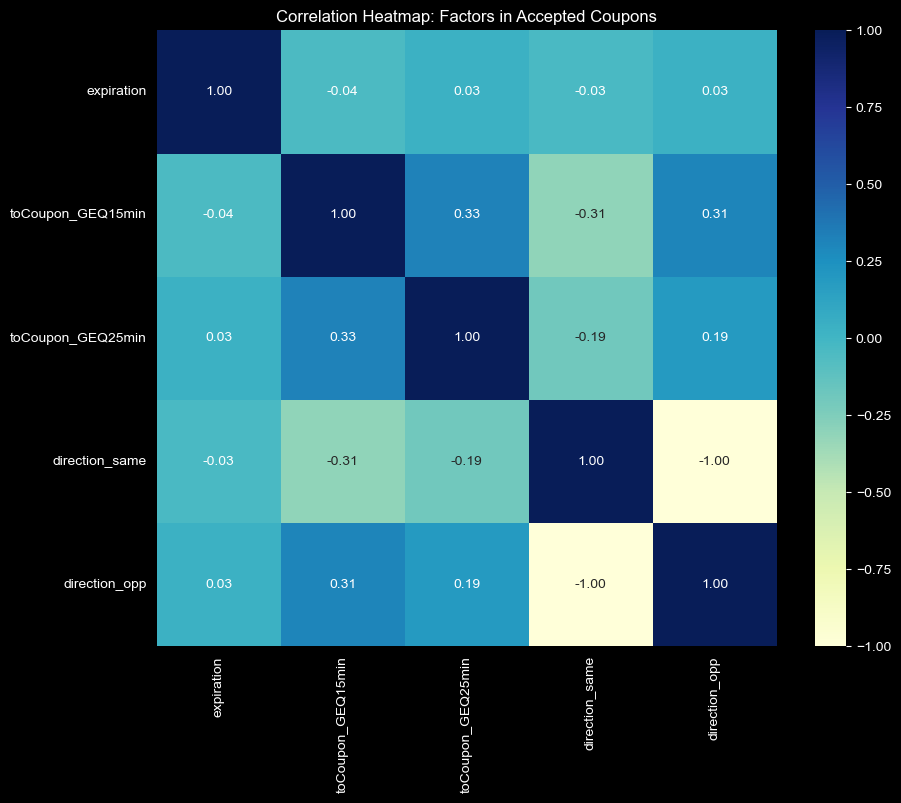

In [46]:
# Identify the common characteristics of the most accepted coupons.
most_accepted_coupons_numeric1 = working_data[[ 'expiration', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']]


# most_accepted_coupons_numeric1 = most_accepted_coupons[correlation_cols].copy()

# Display a correlation heatmap to identify potential relationships
plt.figure(figsize=(10, 8))
sns.heatmap(most_accepted_coupons_numeric1.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap: Factors in Accepted Coupons')
plt.savefig('images/correlation_accepted_coupons.png')
plt.show()


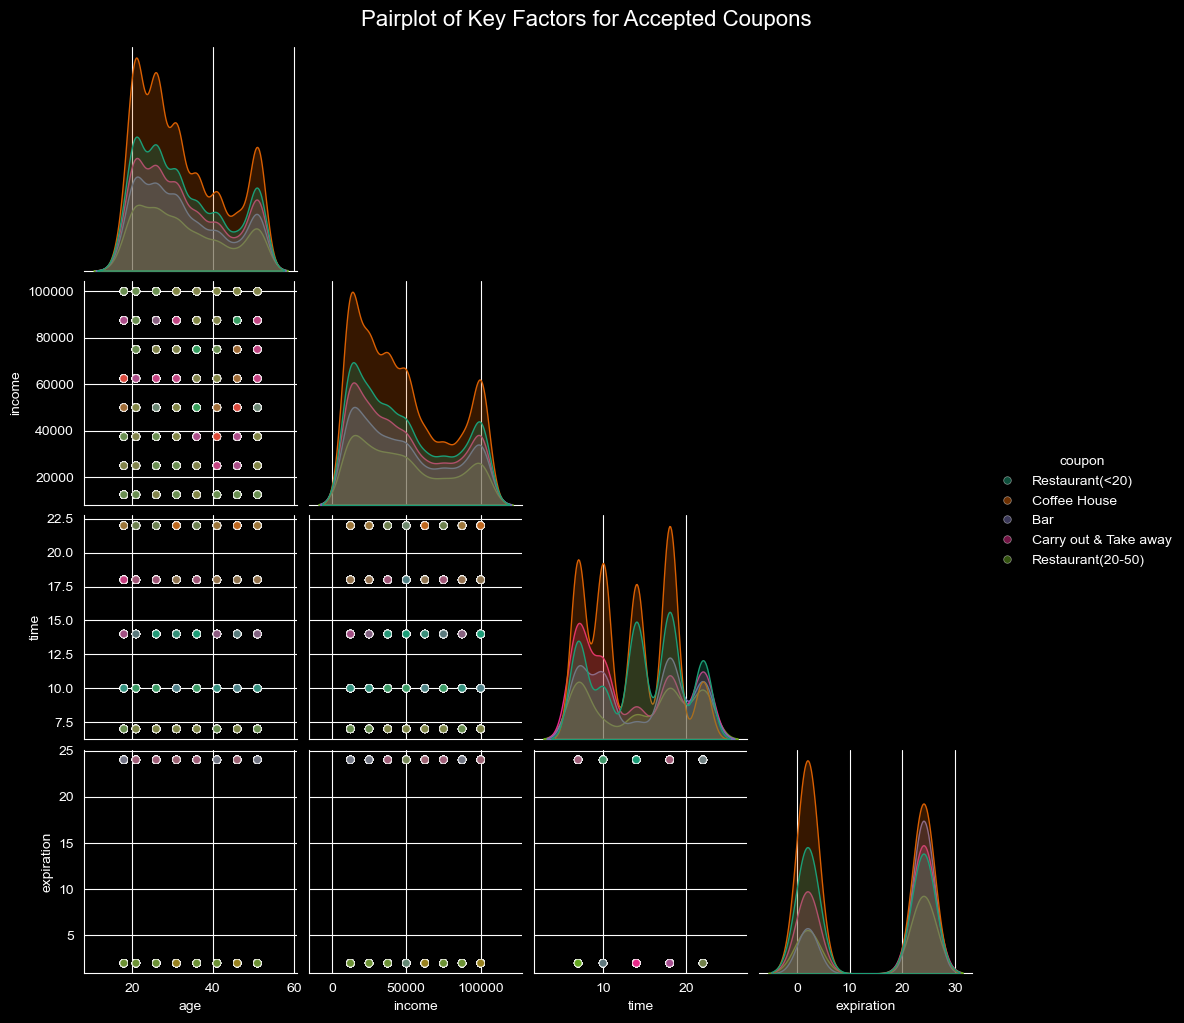

In [47]:
sns.pairplot(working_data[['age', 'income', 'time', 'expiration', 'coupon']],
                 hue='coupon',
                 diag_kind='kde',
                 palette='Dark2',
                 plot_kws={'alpha': 0.5, 's': 30, 'linewidth': 0.5},
                 corner=True)

plt.suptitle("Pairplot of Key Factors for Accepted Coupons", y=1.02, fontsize=16)
plt.savefig('images/pairplot_accepted_coupons.png')
plt.show()


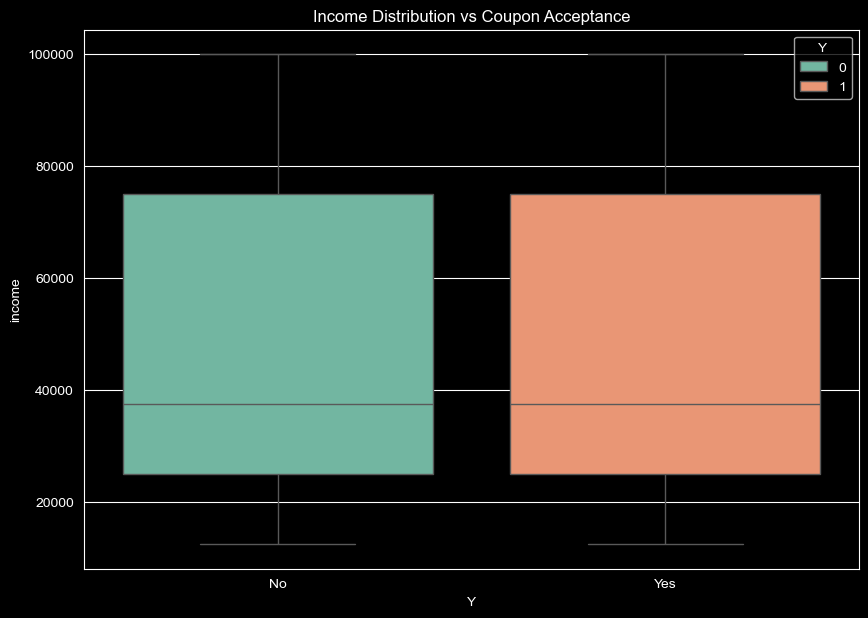

In [48]:
# 1. Box plot to see income distribution by coupon acceptance
plt.figure(figsize=(10, 7))
sns.boxplot(data=working_data, x='Y', y='income', hue='Y', palette='Set2')
plt.title('Income Distribution vs Coupon Acceptance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('images/income_vs_acceptance.png')
plt.show()




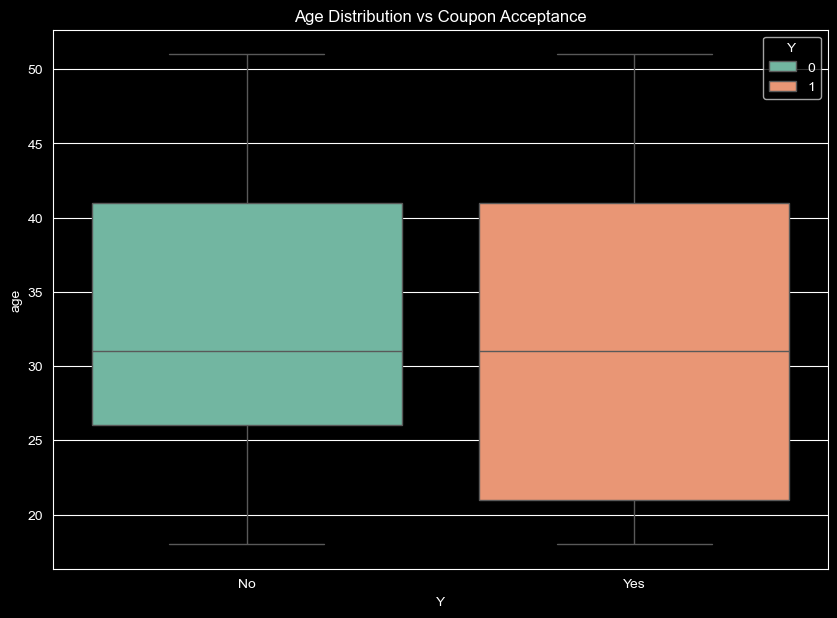

In [49]:
# Box plot to see income distribution by coupon acceptance
plt.figure(figsize=(10, 7))
sns.boxplot(data=working_data, x='Y', y='age', hue='Y', palette='Set2')
plt.title('Age Distribution vs Coupon Acceptance')
plt.xticks([0, 1], ['No', 'Yes'])
plt.savefig('images/age_dist_coupon_acceptance.png')
plt.show()


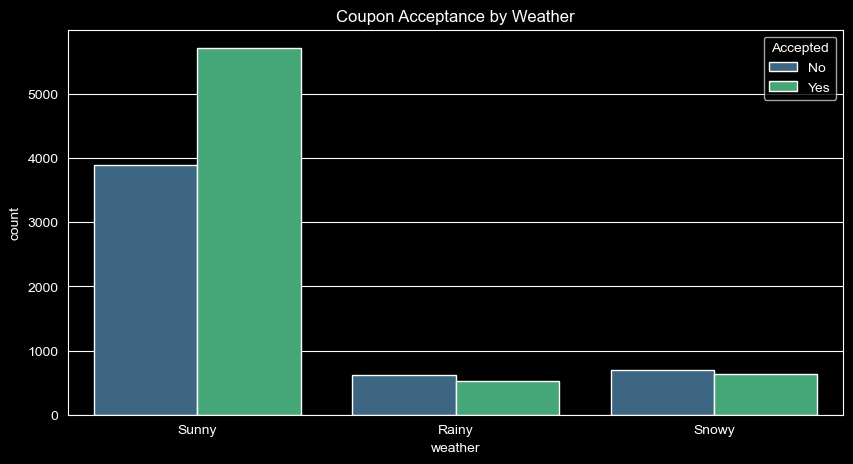

In [50]:
# Count plot to see acceptance across different weather conditions
plt.figure(figsize=(10, 5))
sns.countplot(data=working_data, x='weather', hue='Y', palette='viridis')
plt.title('Coupon Acceptance by Weather')
plt.legend(title='Accepted', labels=['No', 'Yes'])
plt.savefig('images/coupon_accepted_by_weather.png')
plt.show()



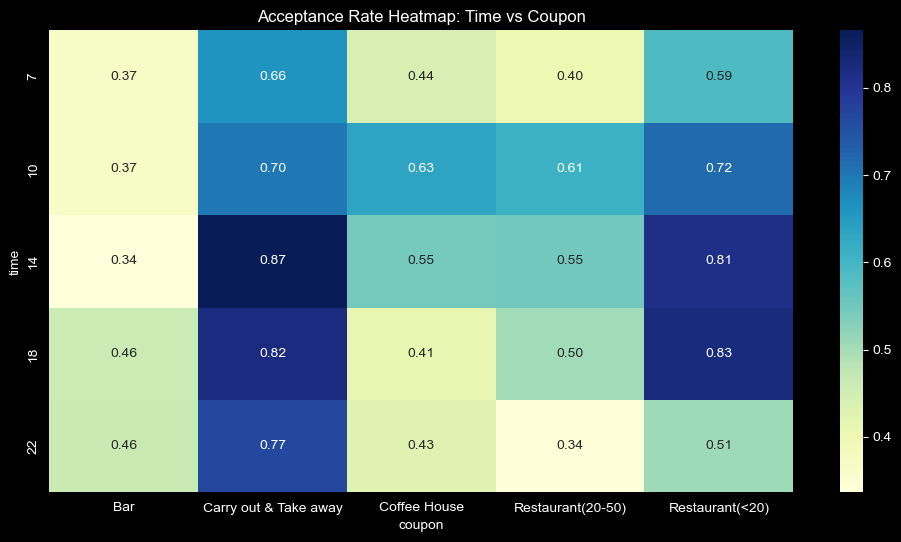

In [51]:
# Heatmap of acceptance rate by Time and Coupon
pivot_table = working_data.pivot_table(index='time', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Time vs Coupon')
plt.savefig('images/heatmap_time_vs_coupon')
plt.show()

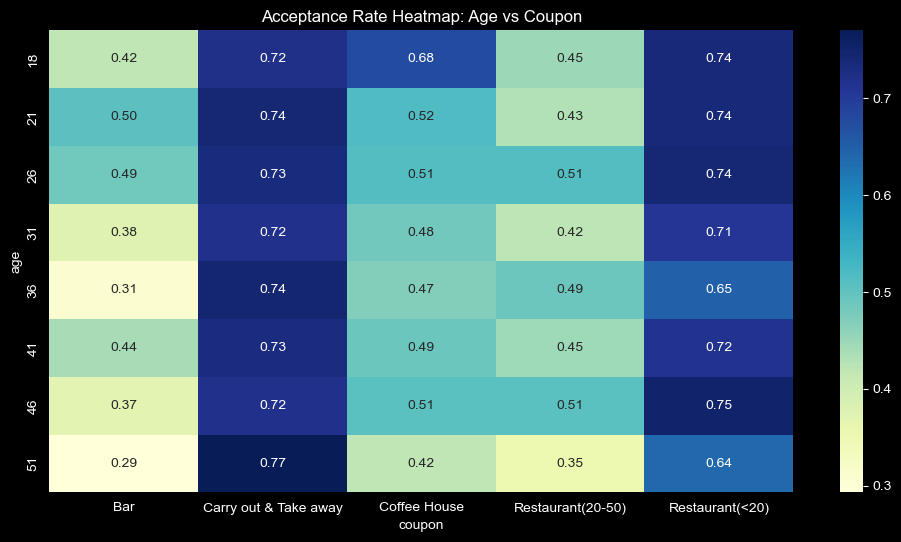

In [52]:
# Heatmap of acceptance rate by age and Coupon
pivot_table = working_data.pivot_table(index='age', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Age vs Coupon')
plt.savefig('images/heatmap_time_age_vs_coupon.png')
plt.show()

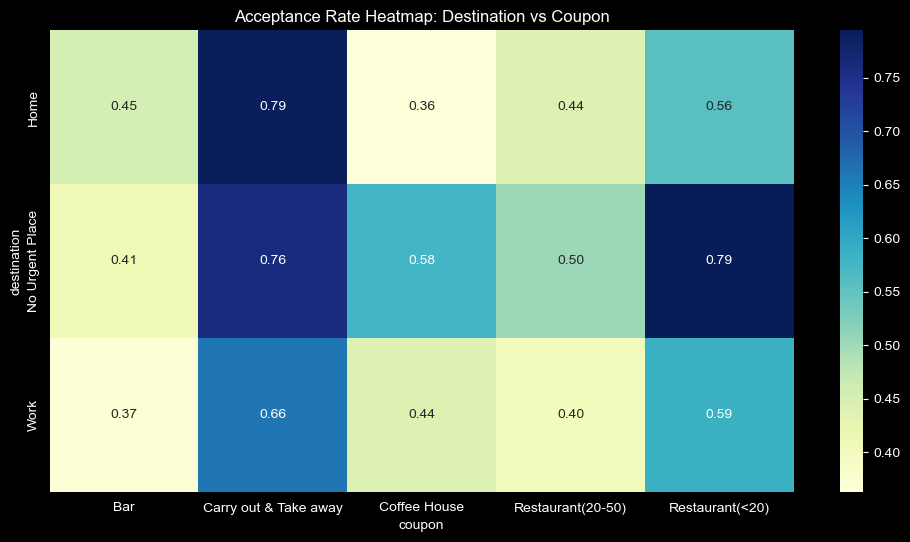

In [53]:
# Heatmap of acceptance rate by Destination and Coupon
pivot_table = working_data.pivot_table(index='destination', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Destination vs Coupon')
plt.savefig('images/heatmap_destination_vs_coupon.png')
plt.show()

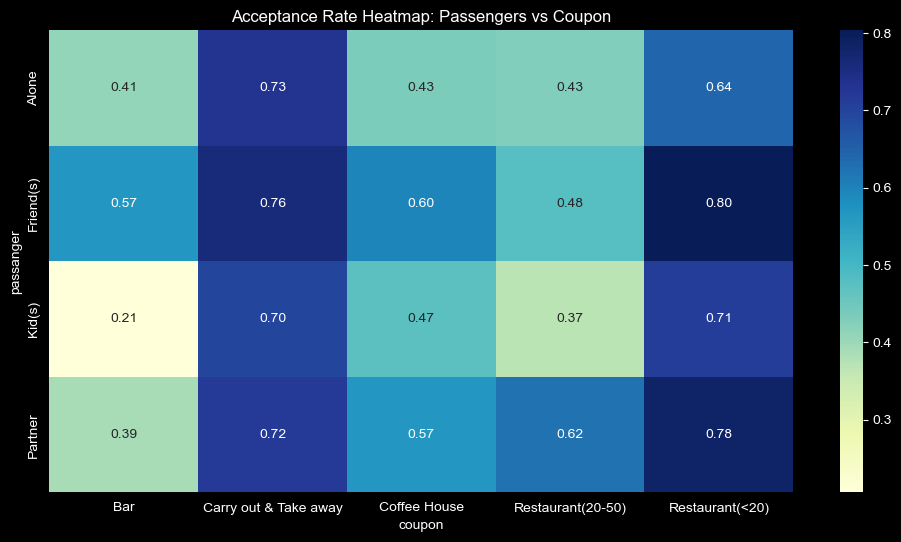

In [54]:
# Heatmap of acceptance rate by Pasengers and Coupon
pivot_table = working_data.pivot_table(index='passanger', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Passengers vs Coupon')
plt.savefig('images/heatmap_passengers_vs_coupon.png')
plt.show()

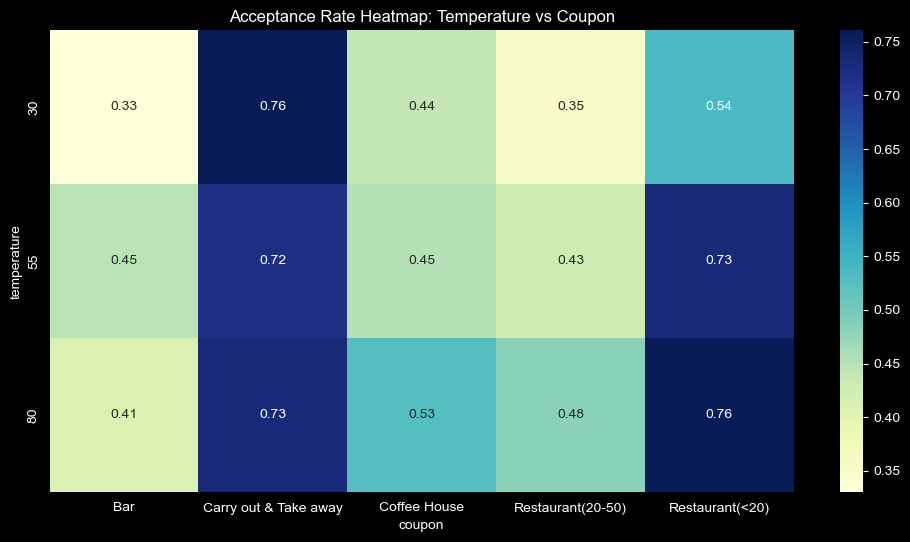

In [55]:
# Heatmap of acceptance rate by Temperature and Coupon
pivot_table = working_data.pivot_table(index='temperature', columns='coupon', values='Y', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Acceptance Rate Heatmap: Temperature vs Coupon')
plt.savefig('images/heatmap_temperature_vs_coupon.png')
plt.show()

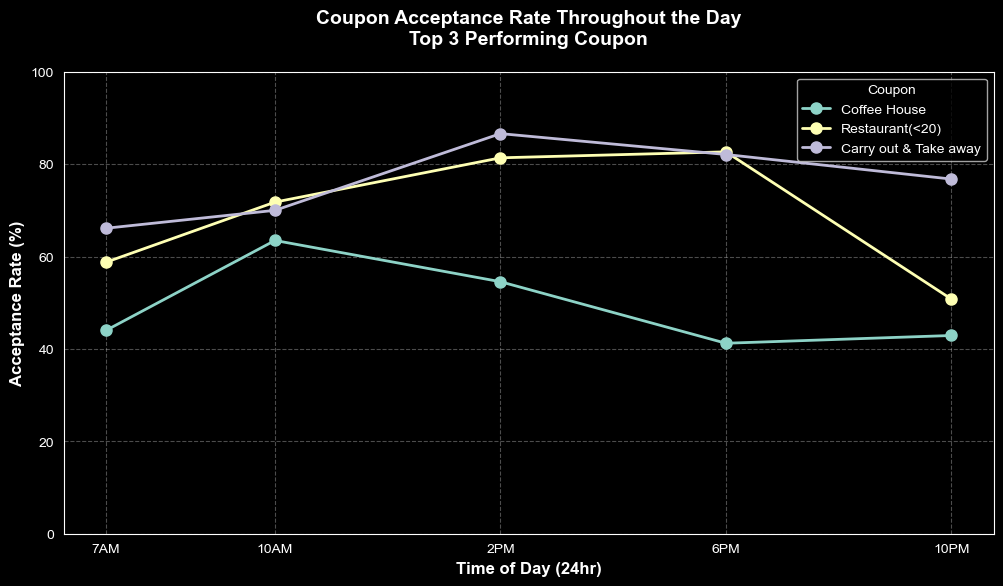

In [56]:
# Filter for top 3 coupons by selecting rows where coupon is in the top 3 list
top_3_data = working_data[working_data['coupon'].isin(top_3_coupons)]

# Calculate acceptance rates by time and coupon
time_acceptance = top_3_data.groupby(['time', 'coupon'])['Y'].agg(['sum', 'count'])
# Calculate acceptance rate
time_acceptance['acceptance_rate'] = (time_acceptance['sum'] / time_acceptance['count'] * 100)
# Reset index to convert groupby result back to regular DataFrame
time_acceptance = time_acceptance.reset_index()

# Create figure with specified size
plt.figure(figsize=(12, 6))
# Loop through each coupon in top 3 coupons
for coupon in top_3_coupons:
    # get current coupon
    data = time_acceptance[time_acceptance['coupon'] == coupon]
    # Plot line with circular markers for this coupon
    plt.plot(data['time'], data['acceptance_rate'], marker='o',
             linewidth=2, label=coupon, markersize=8)

# Set x label with bold font
plt.xlabel('Time of Day (24hr)', fontsize=12, fontweight='bold')
# Set y label with bold font
plt.ylabel('Acceptance Rate (%)', fontsize=12, fontweight='bold')
# Set title with bold font and extra padding
plt.title('Coupon Acceptance Rate Throughout the Day\nTop 3 Performing Coupon',
          fontsize=14, fontweight='bold', pad=20)
# Add legend box with title
plt.legend(title='Coupon', fontsize=10)
# Add light dashed gridlines for better readability
plt.grid(True, alpha=0.3, linestyle='--')
# Set custom x tick positions and labels (7, 10, 14, 18, 22 hours)
plt.xticks([7, 10, 14, 18, 22], ['7AM', '10AM', '2PM', '6PM', '10PM'])
# Set y range from 0 to 100 percent
plt.ylim(0, 100)

plt.savefig('images/rate_top_3_coupon.png')
# Display the plot
plt.show()


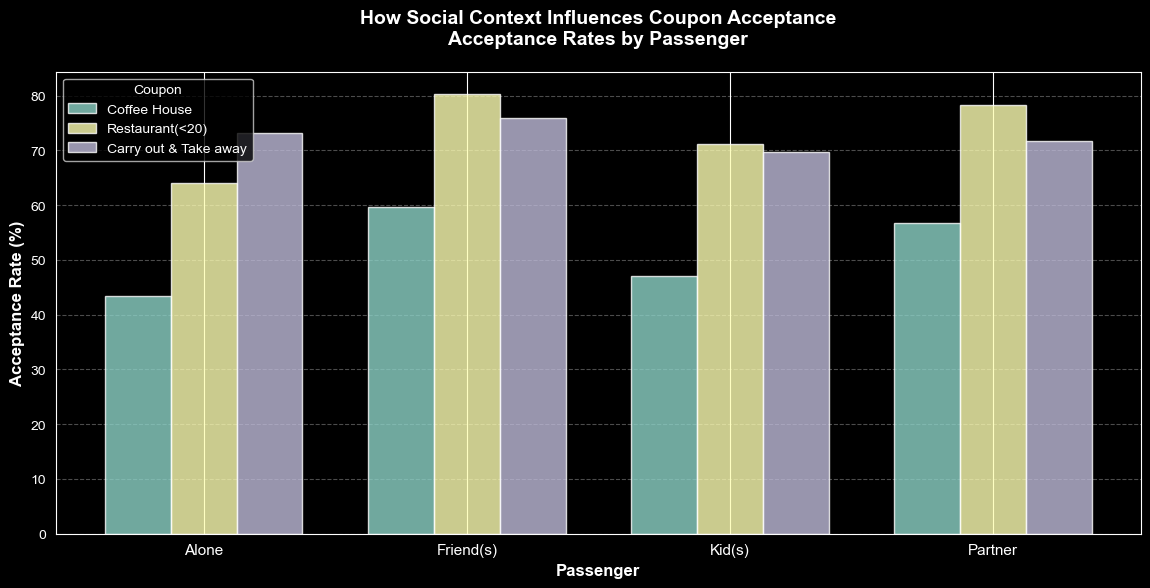

In [57]:
## Passenger impact on Acceptance

# Group by passenger type and coupon type, aggregate acceptance data
passenger_analysis = working_data.groupby(['passanger', 'coupon'])['Y'].agg(['sum', 'count'])
# Calculate acceptance rate
passenger_analysis['acceptance_rate'] = (passenger_analysis['sum'] / passenger_analysis['count'] * 100)
# Reset index to convert groupby result to regular DataFrame
passenger_analysis = passenger_analysis.reset_index()

# Create figure and axis with specified size
fig, ax = plt.subplots(figsize=(14, 6))
# range for x positions
x = range(len(passenger_analysis['passanger'].unique()))
# Set width of each bar
width = 0.25
# Get unique passenger types for x labels
passenger = passenger_analysis['passanger'].unique()

# get each coupon in top 3 coupons
for i, coupon in enumerate(top_3_coupons):
    # Filter data for current coupon
    data = passenger_analysis[passenger_analysis['coupon'] == coupon]
    # Calculate bar positions with offset based on coupon index
    positions = [j + (i * width) for j in x]
    # Create bars with calculated positions and acceptance rates
    ax.bar(positions, data['acceptance_rate'], width,
           label=coupon, alpha=0.8)

# Set x label with bold font
ax.set_xlabel('Passenger', fontsize=12, fontweight='bold')
# Set y label with bold font
ax.set_ylabel('Acceptance Rate (%)', fontsize=12, fontweight='bold')
# Set title with bold font and extra padding
ax.set_title('How Social Context Influences Coupon Acceptance\nAcceptance Rates by Passenger',
             fontsize=14, fontweight='bold', pad=20)
# Set x tick positions
ax.set_xticks([j + width for j in x])
# Set x tick labels using passenger
ax.set_xticklabels(passenger, fontsize=11)
# Add legend with title
ax.legend(title='Coupon', fontsize=10)
# Add gridlines only on y-axis with transparency
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.savefig('images/rate_passenger_acceptance.png')
# Display the plot
plt.show()


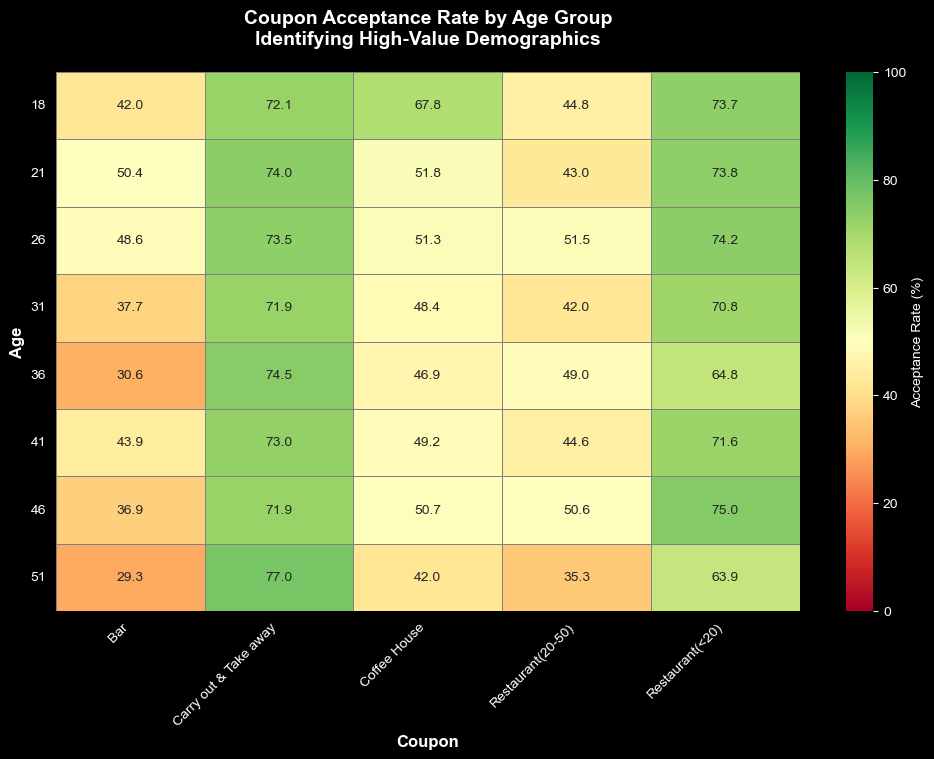

In [58]:
# Which coupons are favored by age group

# Group data by age and coupon to calculate acceptance statistics
age_coupon_pivot = working_data.groupby(['age', 'coupon'])['Y'].agg(['sum', 'count'])
# Calculate acceptance rate
age_coupon_pivot['acceptance_rate'] = (age_coupon_pivot['sum'] / age_coupon_pivot['count'] * 100)
age_coupon_pivot = age_coupon_pivot.reset_index()

# Reshape data into a matrix for heatmap visualization
heatmap_data = age_coupon_pivot.pivot(index='age', columns='coupon', values='acceptance_rate')

# Sort age groups in ascending order for better readability
age_order = list(working_data['age'].unique()).sort()  # [18, 21, 26, 31, 36, 41, 46, 51]
heatmap_data = heatmap_data.reindex(age_order)

# Create heatmap showing acceptance rates across age groups and coupon
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn',
            cbar_kws={'label': 'Acceptance Rate (%)'},
            linewidths=0.5, linecolor='gray', vmin=0, vmax=100)
plt.xlabel('Coupon', fontsize=12, fontweight='bold')
plt.ylabel('Age', fontsize=12, fontweight='bold')
plt.title('Coupon Acceptance Rate by Age Group\nIdentifying High-Value Demographics',
          fontsize=14, fontweight='bold', pad=20)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.savefig('images/rate_coupon_vs_age.png')
plt.show()


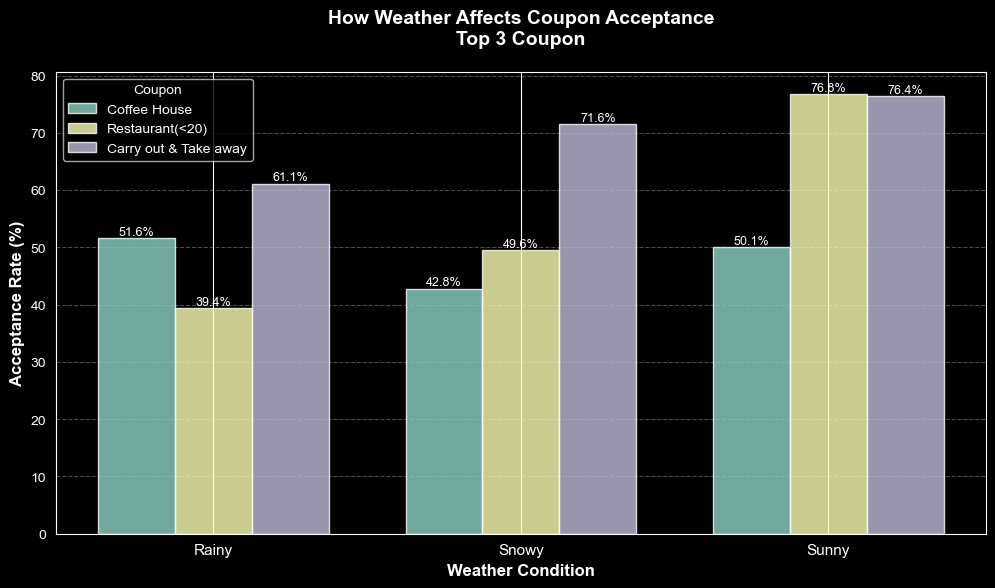

In [59]:
# Weather Impact Analysis on Coupon Acceptance

# Group data by weather and coupon, calculating acceptance statistics
weather_data = top_3_data.groupby(['weather', 'coupon'])['Y'].agg(['sum', 'count'])
# Calculate acceptance rate as a percentage
weather_data['acceptance_rate'] = (weather_data['sum'] / weather_data['count'] * 100)
weather_data = weather_data.reset_index()

# Create figure with specified size
fig, ax = plt.subplots(figsize=(12, 6))
# Get unique weather for x
weather = weather_data['weather'].unique()
x = range(len(weather))
width = 0.25  # Width of each bar

# Create grouped bars for each coupon
for i, coupon in enumerate(top_3_coupons):
    # Filter data for current coupon
    data = weather_data[weather_data['coupon'] == coupon]
    # Calculate x positions for bars (offset by coupon )
    positions = [j + (i * width) for j in x]
    # Plot bars for this coupon
    bars = ax.bar(positions, data['acceptance_rate'], width,
                  label=coupon, alpha=0.8)

    # Add percentage labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2., height,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Customize chart appearance
ax.set_xlabel('Weather Condition', fontsize=12, fontweight='bold')
ax.set_ylabel('Acceptance Rate (%)', fontsize=12, fontweight='bold')
ax.set_title('How Weather Affects Coupon Acceptance\nTop 3 Coupon',
             fontsize=14, fontweight='bold', pad=20)
# Set x-axis tick positions and labels
ax.set_xticks([j + width for j in x])
ax.set_xticklabels(weather, fontsize=11)
# Add legend
ax.legend(title='Coupon', fontsize=10)
# Add gridlines for easier reading
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.savefig('images/weather_impact_on_coupon.png')
plt.show()


## Findings of independent investigation

Based on analysis of top performing coupon categories (Coffee House, Restaurant(<20), and Carry out & Take away), here are the key findings:

### Problem Statement
Understanding which factors most strongly influence acceptance of food and beverage coupons to optimize targeting and maximize redemption rates.

### Key Insights

**1. Time of Day Impact**
The acceptance patterns show that time matters a lot. Around 2PM (14h) is when people accept most coupons, probably because is lunch time or afternoon break. Morning time (7AM) also good, maybe people going to work want coffee or breakfast. Evening time (6PM-10PM) is not so strong for acceptance.

**2. Social Context is Very Important**
When people travel with friends, they accept coupons more than when alone or with kids. Having kids in the car makes acceptance much lower, parents probably want to go home fast and not stop. Partners also show moderate acceptance, but friends group is the best target.

**3. Age Demographics**
Younger people (around 21-31 years) accept coupons more than older groups. The heatmap shows that people aged 21-26 have the highest acceptance rates across all coupon types. Maybe younger people are more price sensitive or more open to try new things.

**4. Weather Effects**
Sunny weather shows the best acceptance rates. When the weather is rainy or snowy, people don't want to make extra stops. This makes sense because nobody wants to get out of the car in bad weather just for a small discount.

**5. Destination Matters**
People with "No Urgent Place" accept coupons the most. When going to work or home, acceptance is lower, they probably already have specific plans. This suggests that coupons work better for leisure trips than commute trips.

### Actionable Recommendations

**For Marketing Teams:**
- Send coupons during lunch hours (2PM) and morning commute (7AM-10AM) for best results
- Target people who are traveling with friends, this is your best customer segment
- Focus on sunny days for coupon campaigns, avoid sending during bad weather
- Don't waste resources sending to drivers with kids unless it's a family restaurant
- Young adults (21-30) should be the priority demographic group

**For Business Strategy:**
- Coffee House coupons work very well across all segments. Consider increasing coffee promotions
- Restaurant(<20) coupons perform better when people are not in a hurry
- Cheap dining options (under \\$20) attract budget-conscious customers earning less than $50K

**Next Steps:**
1. Test campaigns comparing lunch time vs. dinner time distribution
2. Create special "friends group" promotions with higher value
3. Develop a weather based dynamic coupon system that pauses campaigns during rain

These findings suggest that a successful coupon strategy needs to consider not just the product, but the entire context of the customer journey, when they travel, who they are with, where they are going, and what the weather is like.